### Loads correlation for one day --> EN: between East and North , ZZ: between Z and Z channel

In [1]:
#d=load_corr("/data/wsd01/corrdata/OO.HYS14..BHE.OO.HYS14..BHN.jld2","EN",day="2016-01-05")

### Run Below codes for loading files and running DV/V

┌ Warning: Error requiring `HDF5` from `Plots`
│   exception = (LoadError("/home/seismic/.julia/packages/Plots/1KWPG/src/backends/hdf5.jl", 36, UndefVarError(:Group)), Union{Ptr{Nothing}, Base.InterpreterIP}[Ptr{Nothing} @0x00007f943f73947f, Ptr{Nothing} @0x00007f943f7d870c, Ptr{Nothing} @0x00007f943f7d8e75, Ptr{Nothing} @0x00007f943f7d890d, Ptr{Nothing} @0x00007f943f7d96d1, Ptr{Nothing} @0x00007f943f7da2f7, Base.InterpreterIP in top-level CodeInfo for Plots._hdf5_implementation at statement 4, Ptr{Nothing} @0x00007f943f7f77a3, Ptr{Nothing} @0x00007f943f7f7e3c, Ptr{Nothing} @0x00007f943f7f79e4, Ptr{Nothing} @0x00007f943f7f79e4, Ptr{Nothing} @0x00007f943f7f9629, Ptr{Nothing} @0x00007f941f32b83a, Ptr{Nothing} @0x00007f943f7b9e09, Ptr{Nothing} @0x00007f941f41b35a, Ptr{Nothing} @0x00007f941ef38c15, Ptr{Nothing} @0x00007f943f7b9e09, Ptr{Nothing} @0x00007f943f7ca5d6, Ptr{Nothing} @0x00007f941ce7a1ca, Ptr{Nothing} @0x00007f943f7b9e09, Ptr{Nothing} @0x00007f943f7d8e95, Ptr{Nothing} @0x00007f94

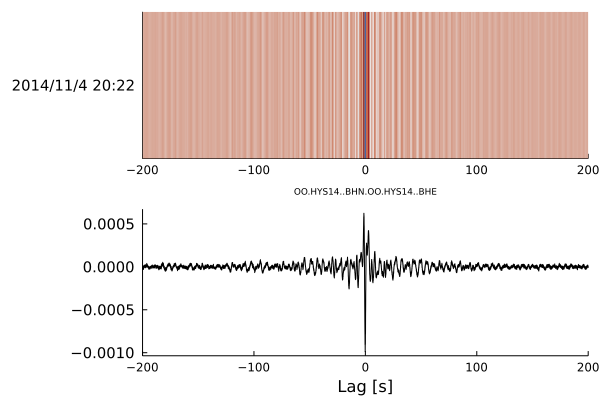

In [2]:
using SeisNoise, SeisIO, Plots
using Dates 
d=load_corr("/data/wsd02/maleen_data/Correl_seismic/OO.HYS14..BHN.OO.HYS14..BHE.jld2","NE")
dailystk=stack(d,interval=Day(30))
allstk=stack(d,allstack=true)
plot(allstk)

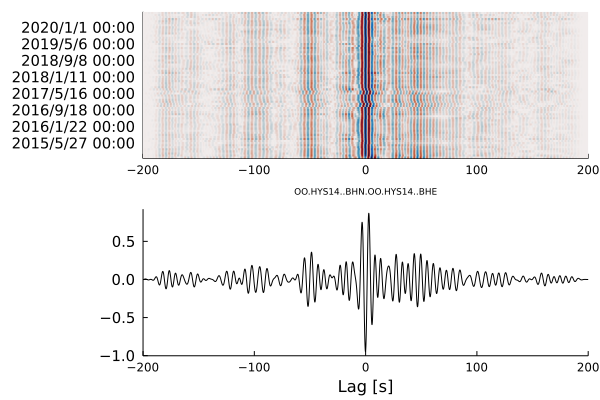

In [3]:
mnf = 0.1
mxf = 0.2
clean_up!(dailystk,mnf,mxf)
abs_max!(dailystk)
plot(dailystk)

### Resolving DV/V from Allstack and Daily Stack

In [8]:
using SeisDvv
fs=40.0     # sample frequency
win_len=30.0  # sliding window length
win_step=10.0 # sliding window step
j=size(dailystk.corr,2)
dvt=zeros(j)
cct=zeros(j)
cctb=zeros(j)

for i in 1:j#1890
    S1=Array(allstk.corr[:])
    S2=Array(dailystk.corr[:,i])
    tmin = 25.
    tmax = 40.
    window = collect(range(Int(floor(tmin*fs)),Int(floor(tmax*fs)),step=1))
    fmin = mnf
    fmax = mxf

    function evenly_spaced(a, b, n)
        h = (b-a)/(n-1)
        collect(a:h:b)
    end

    time=evenly_spaced(-200,200,size(dailystk.corr,1))

    dvv_ts, cc_ts, cdp_Ts, eps_ts, err_ts, allC_ts = SeisDvv.stretching(S1, S2, time, window, fmin, fmax, dvmin=-0.01, dvmax=0.01, ntrial=100);
    dvt[i]=dvv_ts
    cct[i]=cc_ts
    cctb[i]=cdp_Ts
    
end

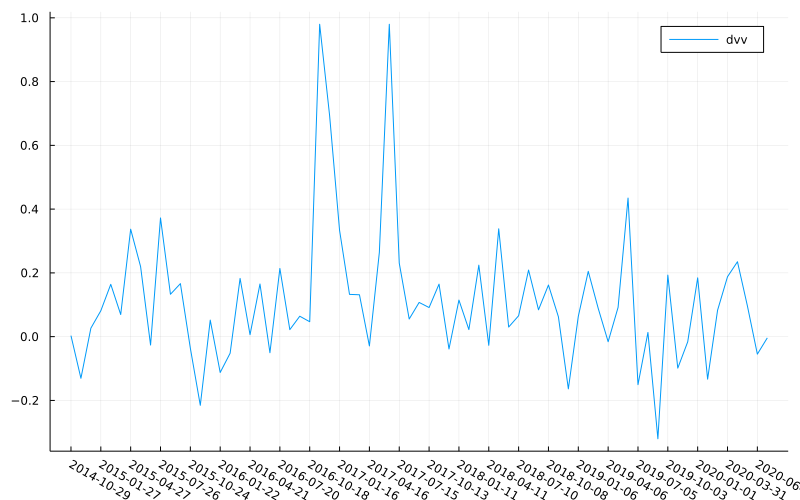

In [9]:
using Plots
using Dates

# Assuming that dt and dvt are defined
dt = map(unix2datetime, dailystk.t)
ticks = dt[1:3:end]
tick = Dates.format.(ticks,"yyyy-mm-dd")
# Include xticks and xlims in the plot function
p = plot(dt, dvt, seriestype = :line, label = "dvv", xticks =(ticks,tick), xrot = -30, size=(800, 500))

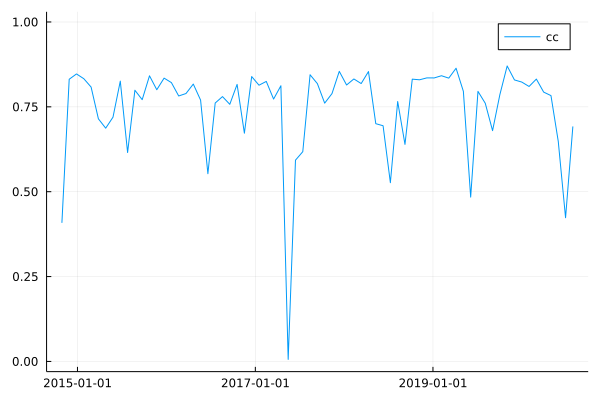

In [11]:
plot(dt,cct,seriestype = :line, ylim =[0,1], label = "cc")
#plot!(dt,cctb,seriestype = :line, ylim =[0,1], label = "cc?")